In [59]:
def drawMatches(img1, kp1, img2, kp2, matches):
    """
    My own implementation of cv2.drawMatches as OpenCV 2.4.9
    does not have this function available but it's supported in
    OpenCV 3.0.0

    This function takes in two images with their associated 
    keypoints, as well as a list of DMatch data structure (matches) 
    that contains which keypoints matched in which images.

    An image will be produced where a montage is shown with
    the first image followed by the second image beside it.

    Keypoints are delineated with circles, while lines are connected
    between matching keypoints.

    img1,img2 - Grayscale images
    kp1,kp2 - Detected list of keypoints through any of the OpenCV keypoint 
              detection algorithms
    matches - A list of matches of corresponding keypoints through any
              OpenCV keypoint matching algorithm
    """

    # #####################################
    # visualization of the matches
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    view = np.zeros((max(h1, h2), w1 + w2, 3), np.uint8)
    view[:h1, :w1, :] = img1  
    view[:h2, w1:, :] = img2
    view[:, :, 1] = view[:, :, 0]  
    view[:, :, 2] = view[:, :, 0]

    for m_b in matches:
        m = m_b[0]
        # draw the keypoints
        # print m.queryIdx, m.trainIdx, m.distance
        color = tuple([np.random.randint(0, 255) for _ in xrange(3)])
        cv2.line(view, (int(kp1[m.queryIdx].pt[0]), int(kp1[m.queryIdx].pt[1])) , 
                 (int(kp2[m.trainIdx].pt[0] + w1), int(kp2[m.trainIdx].pt[1])), color)
        
    return view


In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

%matplotlib inline

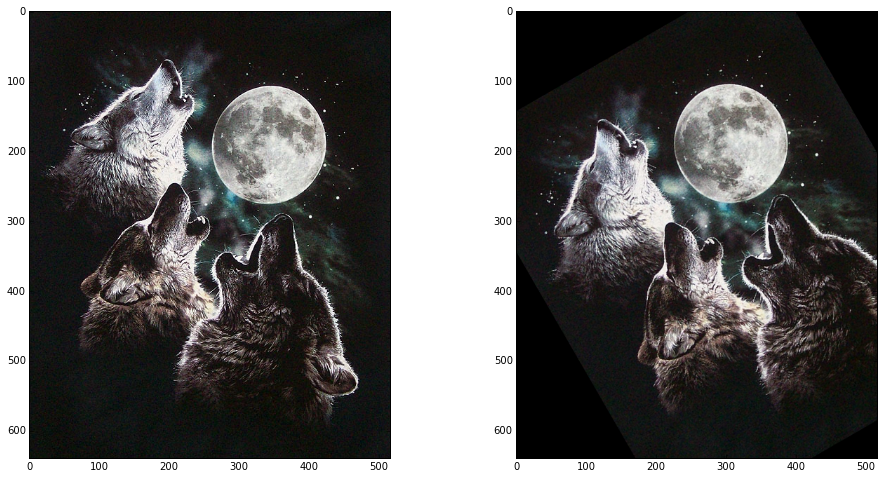

In [15]:
image = cv2.imread('C:/TEMP/Wolfs.jpg')

rotat = cv2.getRotationMatrix2D((image.shape[0]/2, image.shape[1]/2), 30, 1)

rot_image = cv2.warpAffine(image, rotat, (image.shape[1], image.shape[0]))

f, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(image[:, :, ::-1])
ax[1].imshow(rot_image[:, :, ::-1])
plt.show()

In [34]:
orb = cv2.ORB()

keys1 = orb.detect(image)
keys1, desc1 = orb.compute(image, keys1)

keys2 = orb.detect(rot_image)
keys2, desc2 = orb.compute(rot_image, keys2)

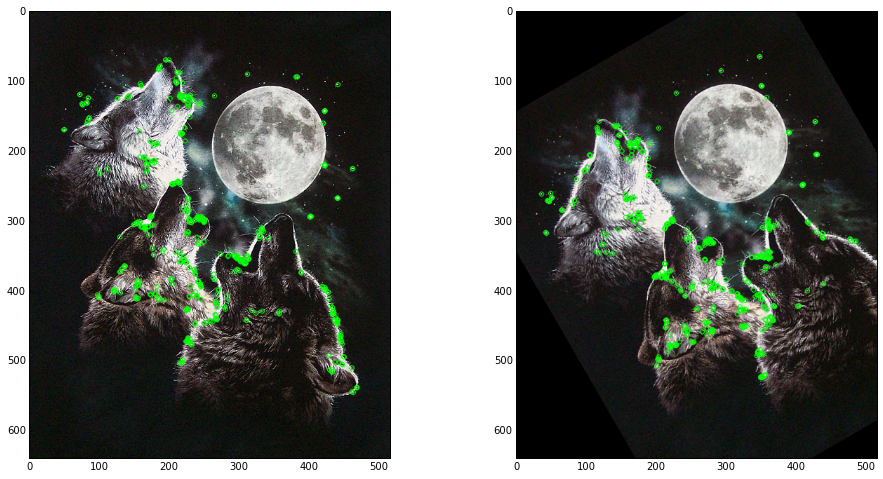

In [37]:
tmp1 = cv2.drawKeypoints(image, keys1,color=(0,255,0), flags=0)
tmp2 = cv2.drawKeypoints(rot_image, keys2,color=(0,255,0), flags=0)


f, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(tmp1[:, :, ::-1])
ax[1].imshow(tmp2[:, :, ::-1])
plt.show()

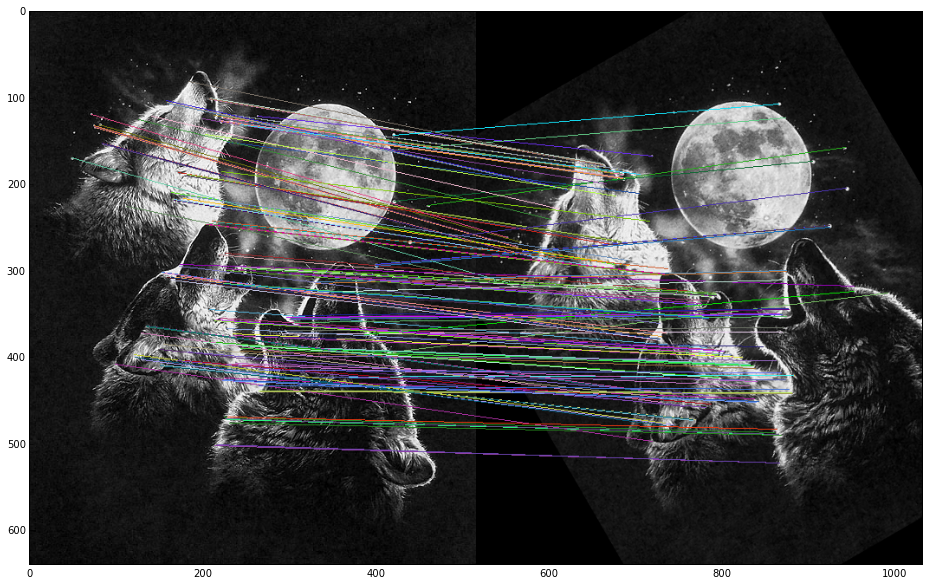

In [62]:
plt.figure(figsize=(16, 12))

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc1, desc2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
res = drawMatches(image, keys1, rot_image, keys2, good)

plt.imshow(res)
plt.show()

In [78]:
num = 20
max_rot = 180

dr = max_rot/num

deps = np.zeros((num+1, 2))
#print " 0 deg:", len(good), "keypoints"

for i in np.arange(num)+1:
    
    rot_tmp = cv2.getRotationMatrix2D((image.shape[0]/2, image.shape[1]/2), dr*i, 1)

    tmp = cv2.warpAffine(image, rot_tmp, (image.shape[1], image.shape[0]))

    keys = orb.detect(tmp) 
    keys, desc = orb.compute(tmp, keys)
    
    # BFMatcher with default params
    matches = bf.knnMatch(desc1, desc, k=2)

    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
    
    deps[i] = [i*dr, len(good)]
    
    print "%3d deg:" % (i*dr), len(good), "keypoints"


  9 deg: 174 keypoints
 18 deg: 166 keypoints
 27 deg: 151 keypoints
 36 deg: 165 keypoints
 45 deg: 152 keypoints
 54 deg: 152 keypoints
 63 deg: 154 keypoints
 72 deg: 131 keypoints
 81 deg: 155 keypoints
 90 deg: 217 keypoints
 99 deg: 140 keypoints
108 deg: 135 keypoints
117 deg: 115 keypoints
126 deg: 122 keypoints
135 deg: 123 keypoints
144 deg: 112 keypoints
153 deg: 116 keypoints
162 deg: 122 keypoints
171 deg: 137 keypoints
180 deg: 198 keypoints


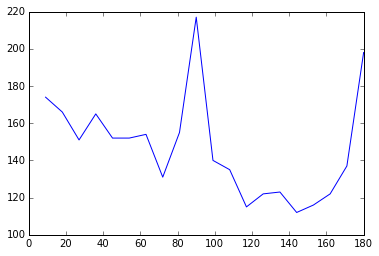

In [79]:
plt.plot(deps[1:, 0], deps[1:, 1])